# Preamble

In [1]:
import os
from importlib import reload
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode
reload(mycode);

In [2]:
from mycode import money
from mycode import preamble
from mycode import weights 
from mycode import maps 

from tqdm import tqdm 

%run mycode/preamble.py

reload(weights)
reload(preamble)
reload(maps)
reload(money);

In [3]:
import astroML
from astroML.plotting import scatter_contour

import numpy as np 

# Read catalogues

## cuts and filters

In [4]:
#filters to apply as reading the catalogue. 
pfilters = [
    maps.get_non_duplicated_cat
]


ffilters = [
    maps.good, 
    maps.best,
    maps.low_cond
]

## read

### basic

In [5]:
prefix = 'final_fitsLSST'
suffixes = ['n20', 'n15', 'n10', 'n05', '00', '05', '10', '15', '20' ]

In [6]:
dcats=maps.retrieve_cats(prefix, which=suffixes)
main_catsLSST = [] 
for suffix in suffixes: 
    main_catsLSST.append(dcats[suffix]) #make sure its correct order 

reading final_fitsLSSTn20
reading final_fitsLSSTn15
reading final_fitsLSSTn10
reading final_fitsLSSTn05
reading final_fitsLSST00
reading final_fitsLSST05
reading final_fitsLSST10
reading final_fitsLSST15
reading final_fitsLSST20


In [7]:
#remove duplicated galaxies and their groups. 
pmain_catsLSST = maps.get_filter_cats(main_catsLSST, pfilters) 

In [8]:
#get g = 0, g=0.02
cat1, cat2 = maps.get_intersection_cats([pmain_catsLSST[4], pmain_catsLSST[-1]])

In [9]:
scat1 = maps.get_filter_cats([cat1], ffilters)[0]
print(len(scat1))

#remember to not apply filters directly on cat2, but intersect
scat1, scat2 = maps.get_intersection_cats([scat1, cat2]) 
print(len(scat1),len(scat2))

77657
77657 77657


### advanced

In [14]:
scats = maps.selection_filter(pmain_catsLSST, ffilters, pmain_catsLSST[4])

#check it works 
print([len(cat) for cat in scats])

[77573, 77573, 77573, 77573, 77573, 77573, 77573, 77573, 77573]


In [15]:
#no cut on condition number. 
pscats = maps.selection_filter(pmain_catsLSST, [maps.good, maps.best], pmain_catsLSST[4])

#check it works 
print([len(cat) for cat in pscats])

[112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938]


In [16]:
pscat1 = pscats[4]
pscat2 = pscats[-1]

# Plot everything together

In [10]:
import pickle

## preparation and functions

In [11]:
ps = np.linspace(0, 0.5, 51)

In [12]:
# def prepare_means(orig_ids,ps, scat1, scat2, param, iso_or_grp ):
#     means1 = [] 
#     errors1 = [] 
#     means2 = [] 
#     errors2 = [] 
#     for p in tqdm(ps): 
#         means1.append(weights.clipped_mean(orig_ids, scat1, param, p))
#         means2.append(weights.clipped_mean(orig_ids, scat2, param, p))
#         errors_p = weights.get_errors(orig_ids, [scat1,scat2], clipped_mean, N=1000, args=[param,p])
#         errors1_iso.append(errors_p[0])
#         errors2_iso.append(errors_p[1])
        

#     wmean1 = weights.wmean(orig_ids, scat1, '1', iso_or_grp, 'component')
#     wmean2 =  weights.wmean(orig_ids, scat2, '1', iso_or_grp, 'component')

#     wmean1_error_iso,wmean2_error_iso = get_errors(orig_ids, [scat1,scat2], wmean, N=1000, args=['1',iso_or_grp,'component'])
# #     #print results. 
# #     print()
# #     print(wmean1_iso, wmean1_mag_iso, wmean2_iso, wmean2_mag_iso)
# #     print(wmean1_error, wmean1_mag_error, wmean2_error,  wmean2_mag_error)

# def quantile_summary(ps, means1, means2, errors1, errors2, wmean1, wmean2, wmean1_error, wmean2_error, legend_size=10,labels_wmean=['']*4): 
#     plt.figure(figsize=(12,12))
    

#     for p, mean in zip(ps, means1): 
#         if mean > 0:
#             plt.plot(p, mean, 'ro', markersize=8)
#         else: 
#             plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)



#     for p, mean in zip(ps, means2): 
#         if mean > 0:
#             plt.plot(p, mean, 'bo', markersize=8)
#         else: 
#             plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='b', markersize=8)
            
    
#     red_dot_fill, = plt.plot([], [], 'ro')
#     red_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='r')
#     blue_dot, = plt.plot([],[], 'bo')
#     blue_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='b', markersize=8)
#     red_diamonds, = plt.plot(ps, errors1, 'r+', label= 'error of mean g=0')
#     blue_diamonds, = plt.plot(ps, errors2, 'bx', label= 'error of means g=0.02')
    

#     red_line = plt.axhline(np.absolute(wmean1), c='r')
#     red_line_dashed = plt.axhline(wmean1_error, c='r', linestyle='--')

#     red_dashdot = plt.axhline(np.absolute(wmean1_mag), c='r', linestyle='dashdot')
#     red_line_dotted = plt.axhline(wmean1_mag_error, c='r', linestyle='dotted')


#     blue_line = plt.axhline(np.absolute(wmean2), c='b')
#     blue_line_dashed = plt.axhline(wmean2_error, c='b', linestyle='--')

#     blue_line_dashdot = plt.axhline(np.absolute(wmean2_mag), c='b', linestyle='dashdot')
#     blue_line_dotted = plt.axhline(wmean2_mag_error, c='b', linestyle='dotted')

#     plt.legend([red_dot_fill, red_dot_nofill, red_diamonds, 
#                 red_line, red_line_dashed, red_dashdot, red_line_dotted, 
#                 blue_dot, blue_dot_nofill, blue_diamonds, 
#                 blue_line, blue_line_dashed], 
#                ["Means zero shear (positive)", "Means zero shear (negative)", "corresponding error", 
#                 f"Weighted mean zero shear ({labels_wmean[0]})", "corresponding error", 
#                 f"Weighted mean,g=0, sn magnitude ({labels_wmean[1]})", "corresponding error",
#                 "Means g=0.02 (positive)",  "Means g=0.02 (negative)",  "Errors on mean g=0.02", 
#                 f"weighted mean g=0.02 ({labels_wmean[2]})", "corresponding error", 
#                 f"weighted mean,g=0.02, sn magnitude ({labels_wmean[3]})", "corresponding error"
#                ], loc='best', prop={"size":legend_size}, bbox_to_anchor=(1,1))
    
#     plt.xlabel('quantile', size=22)
#     plt.xticks(size=18)
#     plt.yticks(size=18)
#     plt.yscale('log')
    

In [13]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple


def prepare_means_errors(ps, scat1, scat2, clipped_mean, args=[], N=1000):
    """
    clipped_mean is a function that takes in a dbt, p
    clipped_mean_fnc is a function that only takes in p. 
    """
    
    orig_ids = list(range(len(scat1)))
    assert orig_ids == list(range(len(scat2)))
        
    means1 = [] 
    errors1 = [] 
    means2 = [] 
    errors2 = [] 
    
    for p in tqdm(ps): 
        print("current p:", p)
        nargs = [p] + args
        means1.append(clipped_mean(orig_ids, scat1, *nargs))
        means2.append(clipped_mean(orig_ids, scat2, *nargs))
        print("calculating errors for p=", p)
        errs = weights.get_errors(orig_ids, [scat1,scat2], clipped_mean, N=N, args=nargs)
        errors1.append(errs[0])
        errors2.append(errs[1])
        
    return means1,errors1,means2,errors2

def plot_negpos(ps, vals, marker_pos, kwargs_pos, marker_neg, kwargs_neg): 
    for p, val in zip(ps, vals):
        if val > 0: 
            plt.plot(p, val, marker_pos, **kwargs_pos)
        else: 
            plt.plot(p, np.absolute(val), marker_neg, **kwargs_neg)
            
def add_custom_legend():
    import matplotlib.lines as mlines

    empty, = plt.plot([], [], 'wo', markersize=7)



    blue_dot, = plt.plot([], [], 'bo', markersize=7)
    blue_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='b', markersize=7)
    red_dot, = plt.plot([],[], 'ro', markersize=7)
    red_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='r', markersize=7)
    red_plus, = plt.plot([],[], "r+", markersize=7)
    blue_cross, = plt.plot([],[], "bx", markersize=7)

    red_line, = plt.plot([],[], 'r-')
    blue_line, = plt.plot([],[], 'b-')

    dotted_line, = plt.plot([],[], 'k-.')

    legend_artists = [empty, empty, (red_dot, blue_dot ), (red_dot_nofill, blue_dot_nofill), 
                      (red_plus, blue_cross), red_line, blue_line, 
                      dotted_line ]
    legend_labels = ["Red: g = 0.0", "Blue: g = 0.02", "Mean > 0", "Mean < 0", "Error on mean", "Weighted mean < 0", 
                     "Weighted mean > 0", "Error on weighted mean"]
    leg = plt.legend(legend_artists, legend_labels, loc='lower left', numpoints=1,
                   handler_map={tuple: HandlerTuple(ndivide=None)})

    for i,text in enumerate(leg.get_texts()):

        if i==0: 
            plt.setp(text, color = 'r')
        elif i==1: 
            plt.setp(text, color = 'b')
        else: 
            break



            

In [14]:
def plot_clipped_means(ps, means1, errors1, means2, errors2, wmean1=None, error_wmean1=None,
                       wmean2=None, error_wmean2=None, ylims=None, plot_weighted=False, add_legend=False):
    
    plt.figure(figsize=(8,8))

    #plot errors
    plt.plot(ps, errors1, 'r+', markersize=8, label= 'error of mean g=0')
    plt.plot(ps, errors2, 'bx', markersize=8, label= 'error of means g=0.02')
    
    #plot the means. 
    plot_negpos(ps, means1, 'ro', {'markersize':8}, 'o', dict(markerfacecolor='None', color='r', markersize=8))
    plot_negpos(ps, means2, 'bo', {'markersize':8}, 'o', dict(markerfacecolor='None', color='b', markersize=8))
    
    if plot_weighted:
        #plot weighted means and errors 
        plt.axhline(np.absolute(wmean1), color='r') #negative. 
        plt.axhline(error_wmean1, color='r', linestyle='-.')

        plt.axhline(wmean2, color='b')
        plt.axhline(error_wmean2, color='b', linestyle='-.')

    
    if add_legend:
        add_custom_legend()

    plt.xlabel('quantile', size=20)
    plt.yscale('log')

    plt.ylim(ylims)

## results

In [15]:
data_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/data'

In [16]:
orig_ids= list(range(len(scat1)))

In [17]:
# means1, errors1, means2, errors2 = prepare_means_errors(ps, scat1, scat2, weights.clipped_mean, args=['bias_g1'])
# pickle.dump((means1, errors1, means2, errors2), open(os.path.join(data_dir,"errors1.p"), 'wb') )
# means1_grp, errors1_grp, means2_grp, errors2_grp = prepare_means_errors(ps, scat1, scat2, weights.clipped_mean, args=['bias_g1_grp'])
# pickle.dump( (means1_grp, errors1_grp, means2_grp, errors2_grp), open(os.path.join(data_dir,"errors1_grp.p"), 'wb') )

In [18]:
means1, errors1, means2, errors2 = pickle.load( open(os.path.join(data_dir, "errors1.p"), 'rb'), 
                                               encoding='latin1')
means1_grp, errors1_grp, means2_grp, errors2_grp = pickle.load(open(os.path.join(data_dir, "errors1_grp.p"), "rb"), encoding='latin1')

In [19]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids, scat2, '1', 'iso', 'component')

wmean1_grp = weights.wmean(orig_ids, scat1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids, scat2, '1', 'grp', 'component')

In [20]:
errs_iso = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'iso', 'component'])
error_wmean1, error_wmean2 = errs_iso

errs_grp = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'grp', 'component'])
error_wmean1_grp, error_wmean2_grp = errs_grp

In [21]:
ps_small = np.linspace(0, 0.5, 26)

In [40]:
# #clipped weighted mean.
# cwmeans1, cwerrors1, cwmeans2, cwerrors2 = prepare_means_errors(ps_small, scat1, scat2, weights.clipped_weighted_mean, N=500, args=['bias_g1', '1', 'iso', 'component'])
# pickle.dump((cwmeans1, cwerrors1, cwmeans2, cwerrors2), open(os.path.join(data_dir, "cwerrors1.p"), "wb"))

# cwmeans1_grp, cwerrors1_grp, cwmeans2_grp, cwerrors2_grp = prepare_means_errors(ps_small, scat1, scat2, weights.clipped_weighted_mean, N=500, args=['bias_g1_grp', '1', 'grp', 'component'])
# pickle.dump((cwmeans1_grp, cwerrors1_grp, cwmeans2_grp, cwerrors2_grp), open(os.path.join(data_dir, "cwerrors1_grp.p"), "wb"))



  0%|          | 0/26 [00:00<?, ?it/s]

current p: 0.0
calculating errors for p= 0.0




  4%|▍         | 1/26 [01:00<25:04, 60.19s/it]

current p: 0.02
calculating errors for p= 0.02




  8%|▊         | 2/26 [02:06<24:49, 62.04s/it]

current p: 0.04
calculating errors for p= 0.04




 12%|█▏        | 3/26 [03:17<24:47, 64.68s/it]

current p: 0.06
calculating errors for p= 0.06




 15%|█▌        | 4/26 [04:31<24:43, 67.44s/it]

current p: 0.08
calculating errors for p= 0.08




 19%|█▉        | 5/26 [05:48<24:35, 70.25s/it]

current p: 0.1
calculating errors for p= 0.1




 23%|██▎       | 6/26 [07:05<24:10, 72.50s/it]

current p: 0.12
calculating errors for p= 0.12




 27%|██▋       | 7/26 [08:24<23:35, 74.49s/it]

current p: 0.14
calculating errors for p= 0.14




 31%|███       | 8/26 [09:48<23:11, 77.30s/it]

current p: 0.16
calculating errors for p= 0.16




 35%|███▍      | 9/26 [11:11<22:23, 79.05s/it]

current p: 0.18
calculating errors for p= 0.18




 38%|███▊      | 10/26 [12:35<21:27, 80.49s/it]

current p: 0.2
calculating errors for p= 0.2




 42%|████▏     | 11/26 [13:58<20:16, 81.12s/it]

current p: 0.22
calculating errors for p= 0.22




 46%|████▌     | 12/26 [15:20<19:01, 81.51s/it]

current p: 0.24
calculating errors for p= 0.24




 50%|█████     | 13/26 [16:42<17:40, 81.58s/it]

current p: 0.26
calculating errors for p= 0.26




 54%|█████▍    | 14/26 [18:07<16:30, 82.57s/it]

current p: 0.28
calculating errors for p= 0.28




 58%|█████▊    | 15/26 [19:37<15:31, 84.67s/it]

current p: 0.3
calculating errors for p= 0.3




 62%|██████▏   | 16/26 [21:07<14:23, 86.38s/it]

current p: 0.32
calculating errors for p= 0.32




 65%|██████▌   | 17/26 [22:22<12:26, 82.92s/it]

current p: 0.34
calculating errors for p= 0.34




 69%|██████▉   | 18/26 [23:33<10:36, 79.51s/it]

current p: 0.36
calculating errors for p= 0.36




 73%|███████▎  | 19/26 [24:44<08:58, 76.93s/it]

current p: 0.38
calculating errors for p= 0.38




 77%|███████▋  | 20/26 [25:48<07:18, 73.02s/it]

current p: 0.4
calculating errors for p= 0.4




 81%|████████  | 21/26 [26:52<05:51, 70.28s/it]

current p: 0.42
calculating errors for p= 0.42




 85%|████████▍ | 22/26 [27:52<04:29, 67.30s/it]

current p: 0.44
calculating errors for p= 0.44




 88%|████████▊ | 23/26 [28:43<03:07, 62.37s/it]

current p: 0.46
calculating errors for p= 0.46




 92%|█████████▏| 24/26 [29:28<01:54, 57.02s/it]

current p: 0.48
calculating errors for p= 0.48




 96%|█████████▌| 25/26 [30:07<00:51, 51.73s/it]

current p: 0.5
calculating errors for p= 0.5




100%|██████████| 26/26 [30:40<00:00, 45.99s/it]

In [22]:
cwmeans1, cwerrors1, cwmeans2, cwerrors2 = pickle.load(open(os.path.join(data_dir, "cwerrors1.p"), 'rb'), encoding='latin1')

In [23]:
cwmeans1_grp, cwerrors1_grp, cwmeans2_grp, cwerrors2_grp = pickle.load(open(os.path.join(data_dir, "cwerrors1_grp.p"), 'rb'), encoding='latin1')

## plot all (selected criteria)

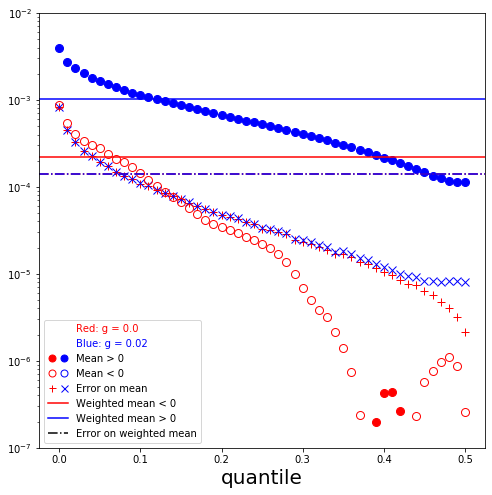

In [29]:
plot_clipped_means(ps, means1, errors1, means2, errors2, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-7,1e-2], plot_weighted=True, add_legend=True)

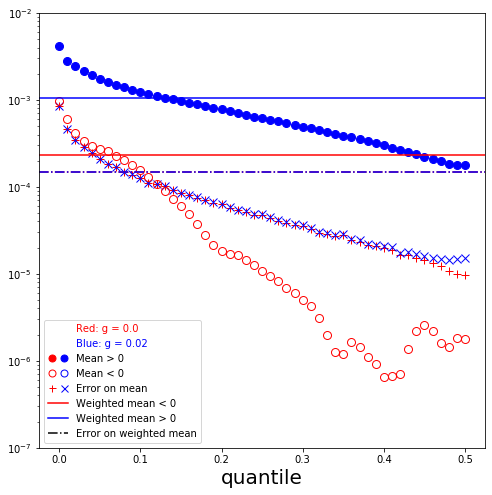

In [32]:
plot_clipped_means(ps, means1_grp, errors1_grp, means2_grp, errors2_grp, wmean1_grp, error_wmean1_grp, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2], plot_weighted=True, add_legend=True)

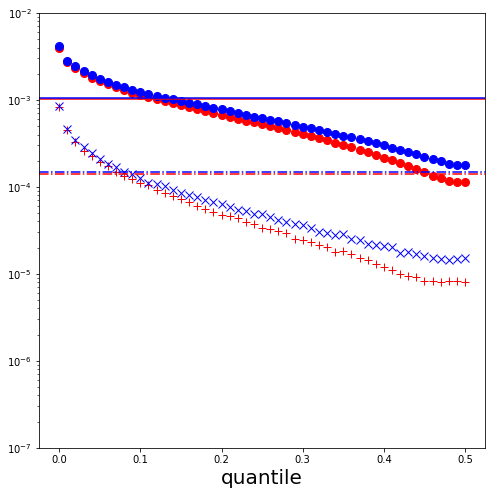

In [33]:
#plot only the ones with applied shear. 
plot_clipped_means(ps, means2, errors2, means2_grp, errors2_grp, wmean2, error_wmean2, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2], plot_weighted=True, add_legend=False)

## plot isolated 

In [51]:
temp1 = scat1[scat1['grp_size']==1]
temp2 = scat2[scat2['grp_size']==1]

In [52]:
orig_ids1 = list(range(len(temp1)))
orig_ids2 = list(range(len(temp2)))

In [53]:
means1_1, errors1_1, means2_1, errors2_1 = prepare_means_errors(ps, 'bias_g1', temp1, temp2)
means1_grp_1, errors1_grp_1, means2_grp_1, errors2_grp_1 = prepare_means_errors(ps, 'bias_g1_grp', temp1, temp2) 

100%|██████████| 51/51 [02:06<00:00,  2.08s/it]


In [56]:
wmean1 = weights.wmean(orig_ids1, temp1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids2, temp2, '1', 'iso', 'component')
wmean1_grp = weights.wmean(orig_ids1, temp1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids2, temp2, '1', 'grp', 'component')

error_wmean1=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]
error_wmean2=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]

error_wmean1_grp=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]
error_wmean2_grp=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]

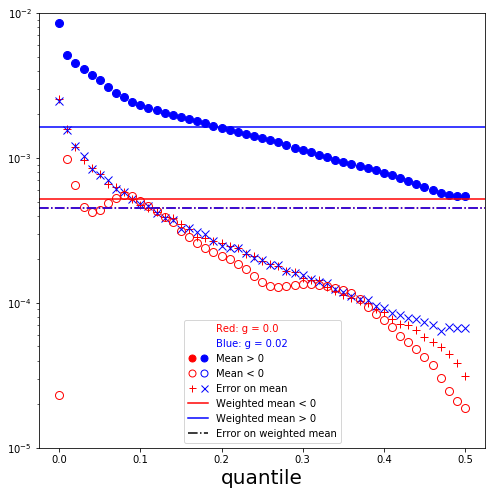

In [60]:
plot_clipped_means(ps, means1_1, errors1_1, means2_1, errors2_1, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-5,1e-2])

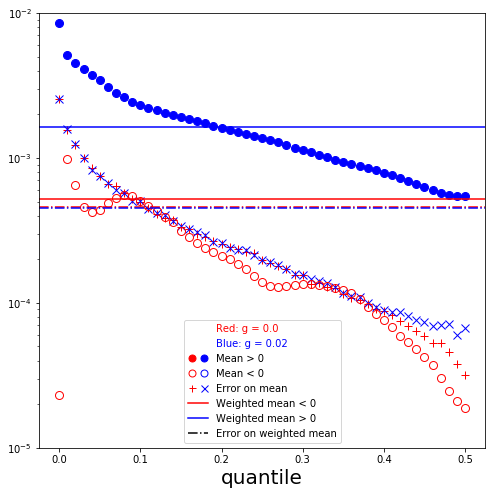

In [62]:
plot_clipped_means(ps, means1_grp_1, errors1_grp_1, means2_grp_1, errors2_grp_1, wmean1_grp, error_wmean1_grp,
                   wmean2_grp, error_wmean2_grp, ylims=[1e-5,1e-2])

## plot blended ones

In [66]:
temp1 = scat1[scat1['grp_size']>1]
temp2 = scat2[scat2['grp_size']>1]

In [67]:
means1_2, errors1_2, means2_2, errors2_2 = prepare_means_errors(ps, 'bias_g1', temp1, temp2)
means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2 = prepare_means_errors(ps, 'bias_g1_grp', temp1, temp2) 


100%|██████████| 51/51 [05:36<00:00,  5.53s/it]

In [72]:
orig_ids1 = list(range(len(temp1)))
orig_ids2 = list(range(len(temp2)))

In [69]:
wmean1 = weights.wmean(orig_ids1, temp1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids2, temp2, '1', 'iso', 'component')
wmean1_grp = weights.wmean(orig_ids1, temp1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids2, temp2, '1', 'grp', 'component')

error_wmean1=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]
error_wmean2=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]

error_wmean1_grp=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]
error_wmean2_grp=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]

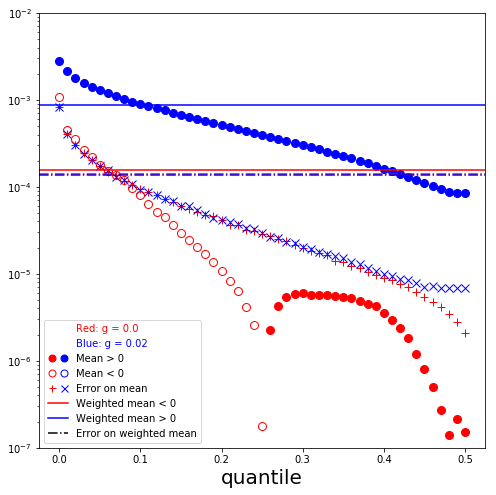

In [79]:
plot_clipped_means(ps, means1_2, errors1_2, means2_2, errors2_2, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-7,1e-2])

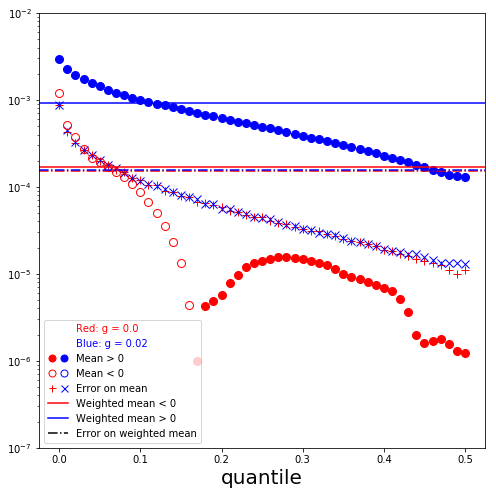

In [80]:
plot_clipped_means(ps, means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2, wmean1_grp, error_wmean1_grp, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2])

## Plot weighted clipped mean 

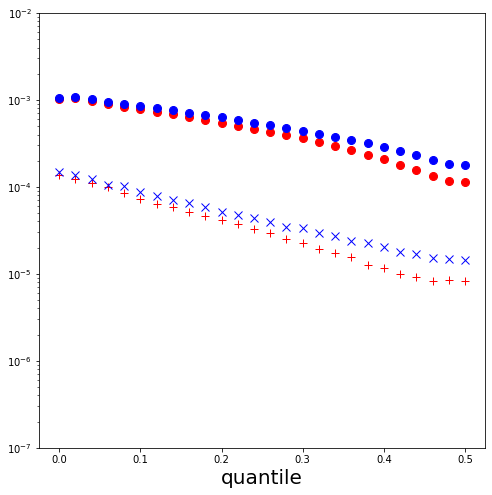

In [35]:
#plot only the ones with applied shear. 
plot_clipped_means(ps_small, cwmeans2, cwerrors2, cwmeans2_grp, cwerrors2_grp, ylims=[1e-7,1e-2], 
                   plot_weighted=False, add_legend=False)

# Triangle plots of biases

In [40]:
import corner 
reload(corner)


myrange = [ (-2000, 8000), (-6, 1), (-6e-5, 1e-4), (-6e-5, 1e-4), (-7.5, 5), (-7.5, 5)]

## blending off 

In [41]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']

biases = np.array([list(scat1[param]) for param in params]).T

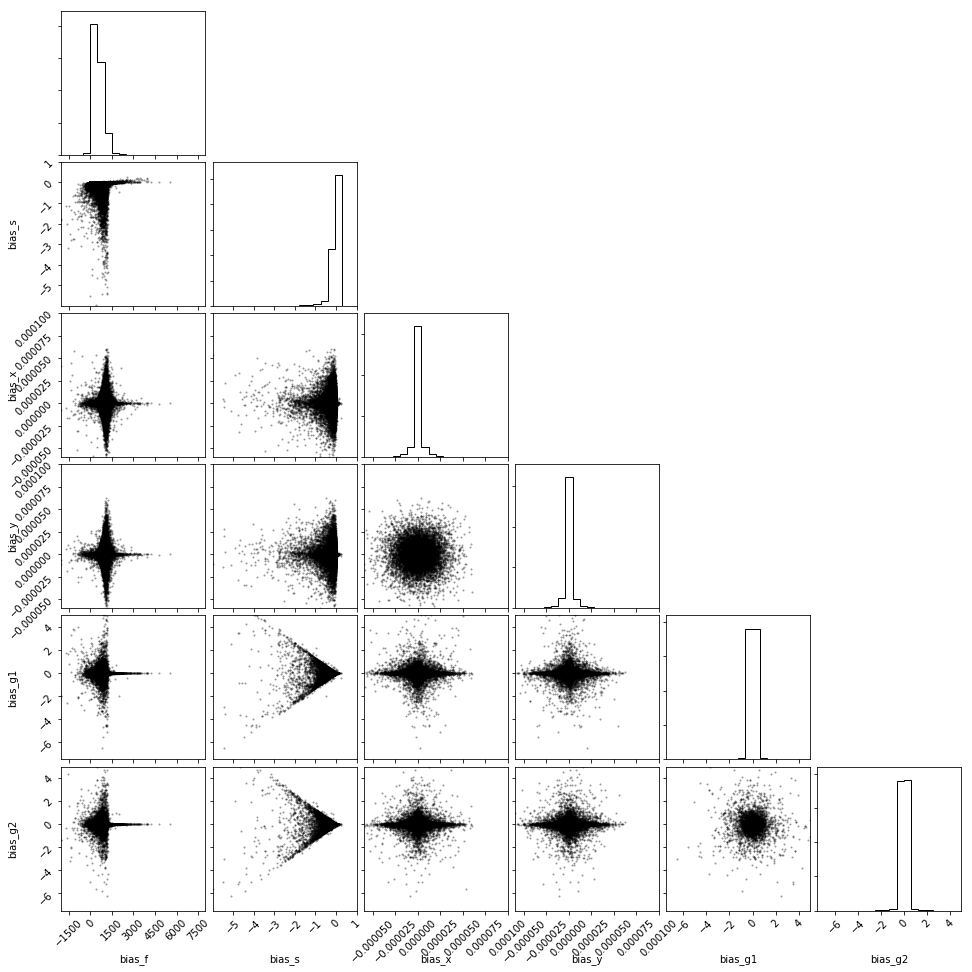

In [42]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases, labels=params, title_kwargs={"size": 30}, max_n_ticks=7, range=myrange, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))



## blending on 

In [27]:
params_grp = [param+'_grp' for param in params]
biases_grp = np.array([list(scat1[param]) for param in params_grp]).T

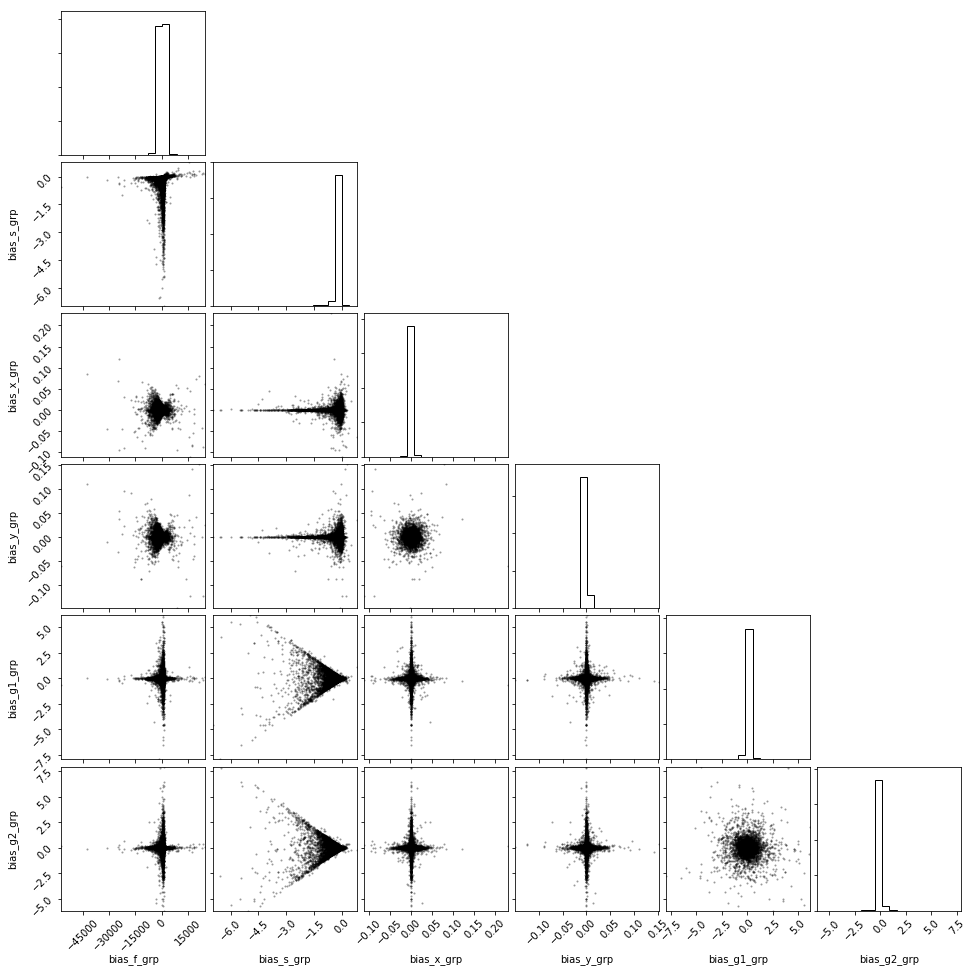

In [28]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))




## bulge, and bulge+disk separately

In [43]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']
params_grp = [param+'_grp' for param in params]
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4}}

In [44]:

biases = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params_grp]).T

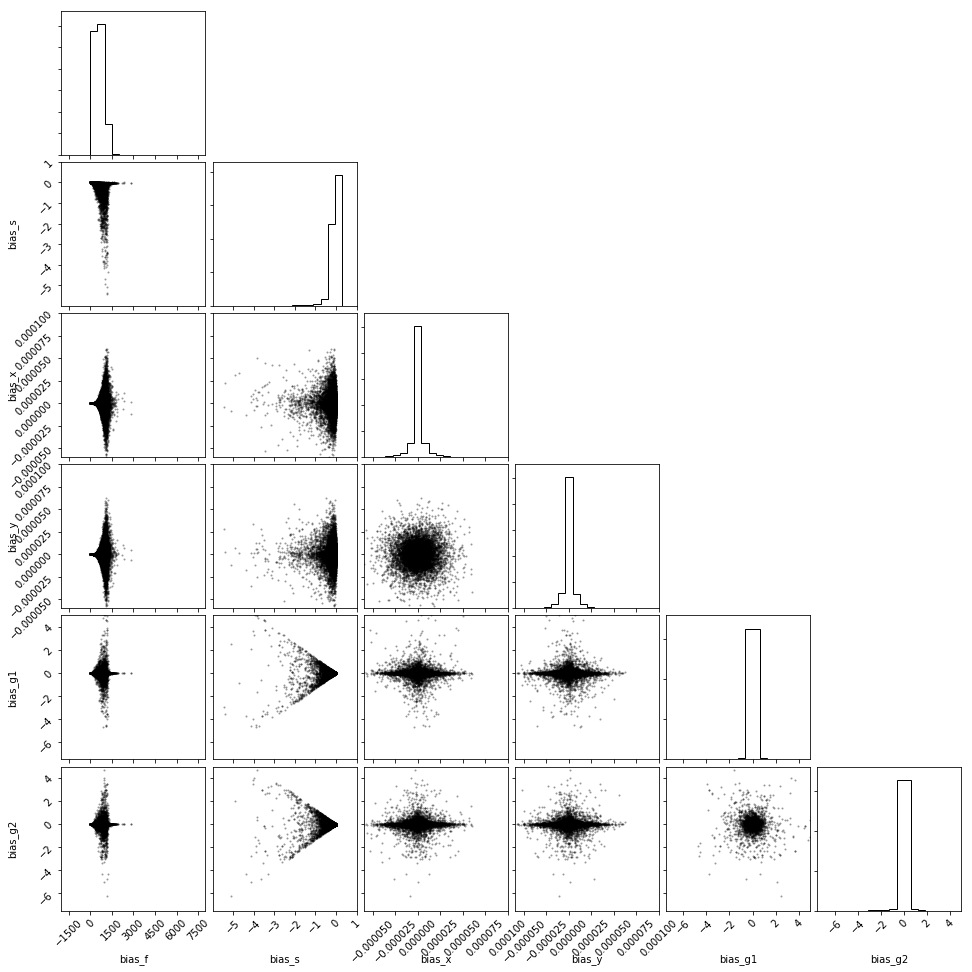

In [45]:
#all disk. 

#blending off, then on. 
figure = corner.corner(biases, range=myrange,  labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# plt.figure()
# figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);



In [47]:
#mixed
cond = (scat1['f_disk'] < 1) & (scat1['f_disk']>0)
biases = np.array([list(scat1[cond][param]) for param in params]).T
biases_grp = np.array([list(scat1[cond][param]) for param in params_grp]).T

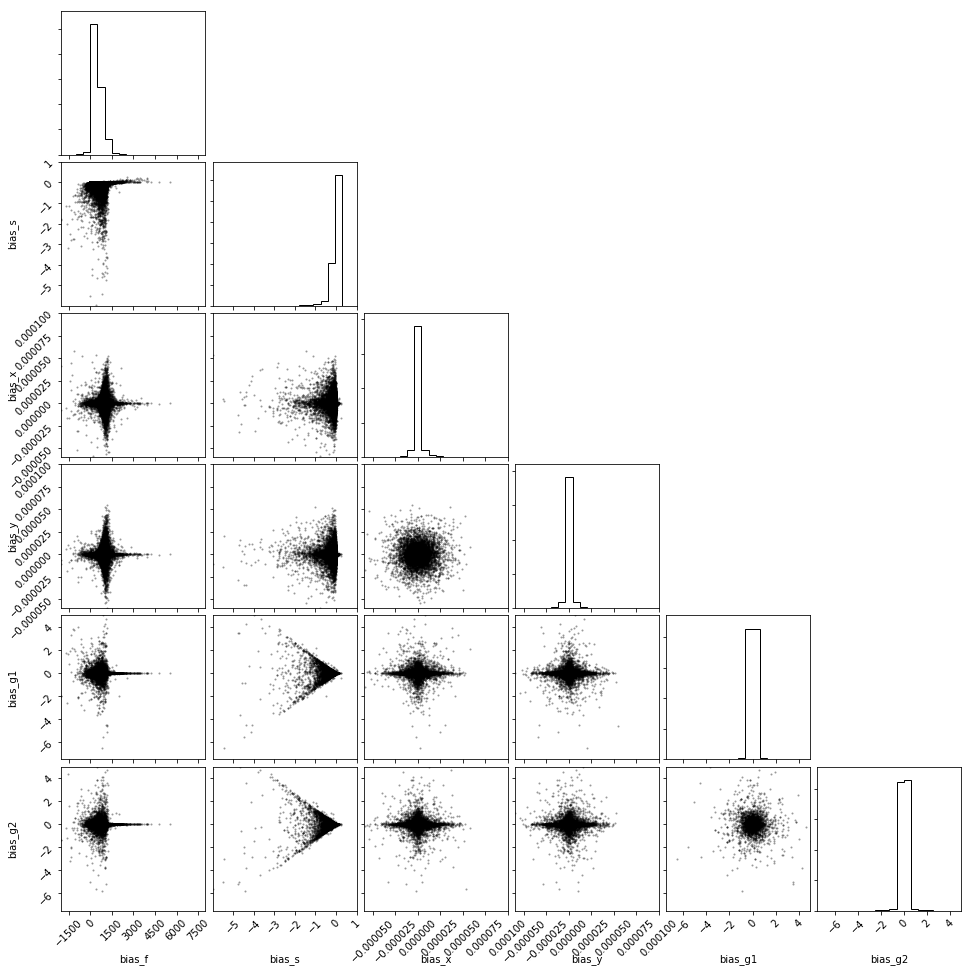

In [48]:
#blending off, then on. 
figure = corner.corner(biases, range=myrange, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# plt.figure()
# figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);




In [49]:
#only bulge

biases = np.array([list(scat1[scat1['f_disk']==0][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']==0][param]) for param in params_grp]).T

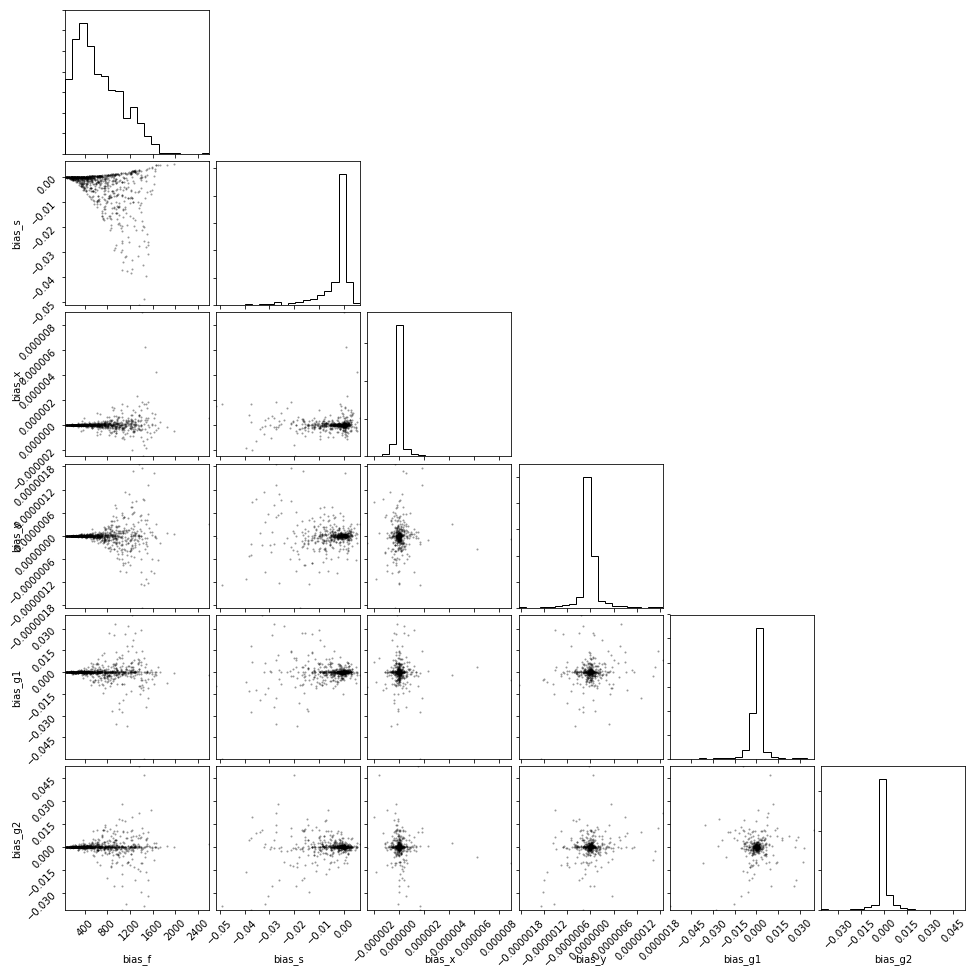

In [50]:
#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# plt.figure()
# figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);

# Money Plot 


## test 

In [17]:
g1s = [-0.02, -0.015, -0.1, -0.005, 0, 0.005, 0.01, 0.015, .02]
orig_ids = list(range(len(scats[0])))
args_iso=['1', 'iso']
args_grp=['1', 'grp']

In [18]:
fnc=weights.median_fnc

In [20]:
values = [fnc(orig_ids, cat, *args_iso) for cat in scats]
values_grp = [fnc(orig_ids, cat, *args_grp) for cat in scats]

In [27]:
covs = money.get_boostrap_covariance_matrix(orig_ids, scats, weights.median_fnc, N=1000, 
                                     args_iso=args_iso, args_grp=args_grp)

In [28]:
cov, cov_grp, corr, corr_grp = covs
inv, inv_grp = np.linalg.inv(cov), np.linalg.inv(cov_grp)

In [34]:
model = money.linear_f
fit_procedure = money.chi_sq_fit
beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s, values, inv, model )
beta0_grp, beta1_grp,beta0_err_grp,beta1_err_grp,beta01_corr_grp = fit_procedure(g1s, values_grp, inv_grp, model)


1.844545388079653e-06

## Consistency with old medians? 

[112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938]


In [34]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(pscats[0])))

In [35]:
pmedian_prep = money.prepare_money_plot(g1s, orig_ids, pscats, weights.median_fnc, fit_procedure=money.chi_sq_fit, 
                         N=int(1e3), model=money.linear_f, args_iso=['1', 'iso'], args_grp=['1', 'grp'])

In [36]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = pmedian_prep

Results for fits of unblended case: 


 value b0:     1.471e-03
error b0:     4.374e-05
value b1:     3.230e-07
error b1:     1.147e-07
error correlation coefficient: 1.771e-01

Results for fits of blended case: 


 value b0:     3.554e-03
error b0:     9.038e-05
value b1:     -2.893e-06
error b1:     1.619e-06
error correlation coefficient: -6.342e-02


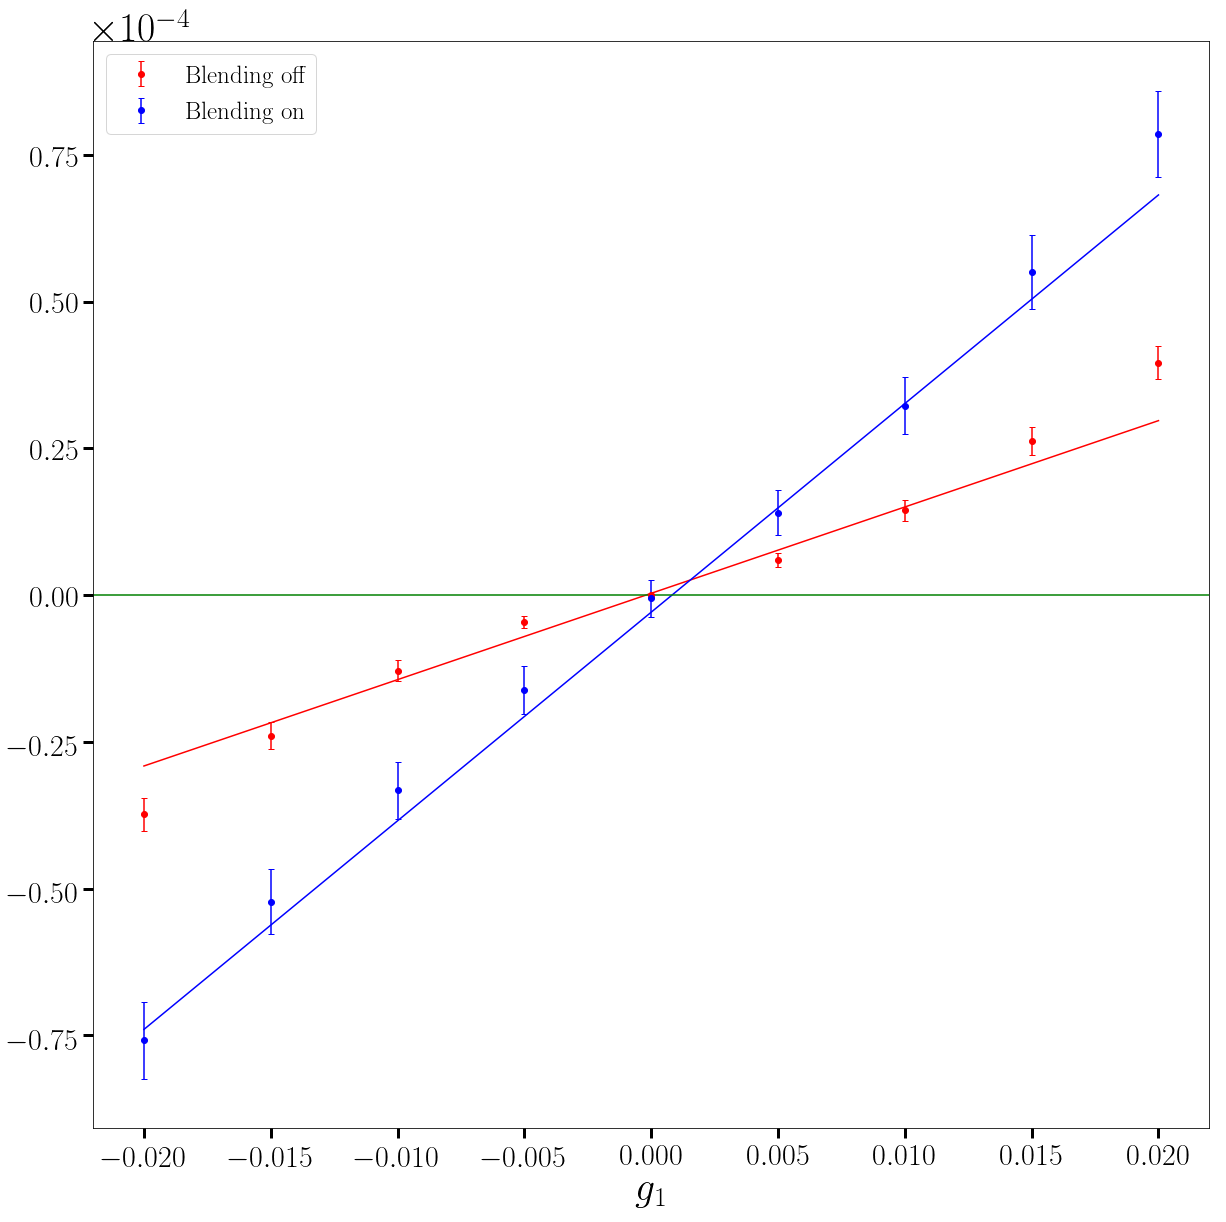

In [37]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

## medians

In [90]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(scats[0])))

In [91]:
median_prep = money.prepare_money_plot(g1s, orig_ids, scats, weights.median_fnc, fit_procedure=money.chi_sq_fit, 
                         N=int(1e4), model=money.linear_f, args_iso=['1', 'iso'], args_grp=['1', 'grp'])

In [103]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = median_prep

### check bootstrapped values 

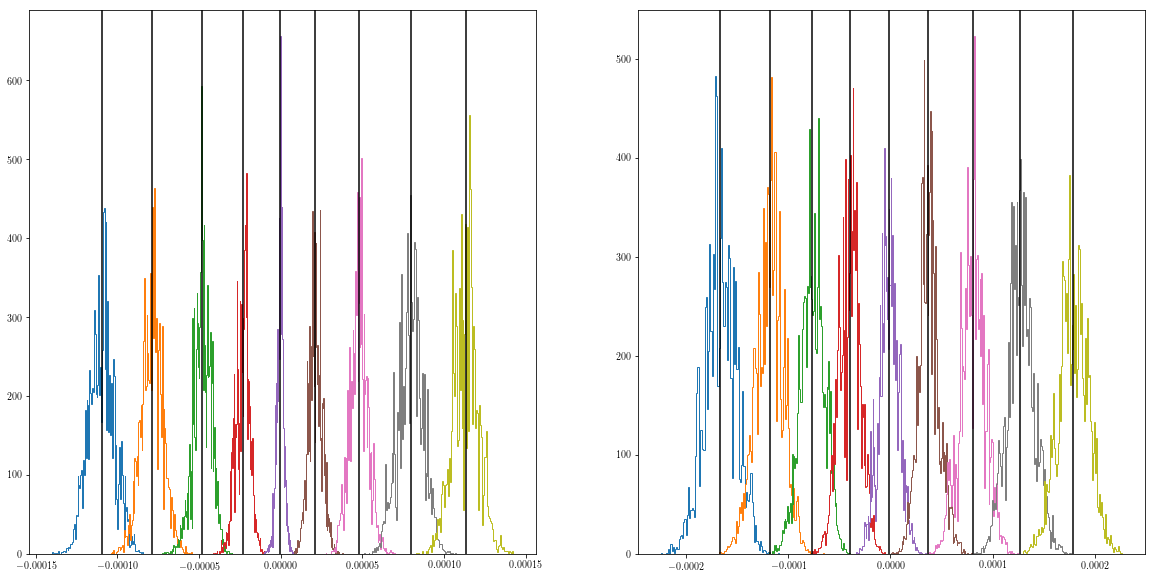

In [104]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
ax1,ax2 = axs.flatten()
for val, val_grp, vals, vals_grp  in zip(values, values_grp, boot_values, boot_values_grp): 
    ax1.hist(vals, histtype='step', bins=100)
    ax1.axvline(val,color='k')
    ax2.hist(vals_grp, histtype='step', bins=100)
    ax2.axvline(val_grp, color='k')

### make money plot 

Results for fits of unblended case: 


 value b0:     5.256e-03
error b0:     1.176e-04
value b1:     -1.028e-06
error b1:     8.728e-07
error correlation coefficient: -5.108e-02

Results for fits of blended case: 


 value b0:     8.387e-03
error b0:     1.996e-04
value b1:     -9.593e-06
error b1:     6.159e-06
error correlation coefficient: -5.218e-02


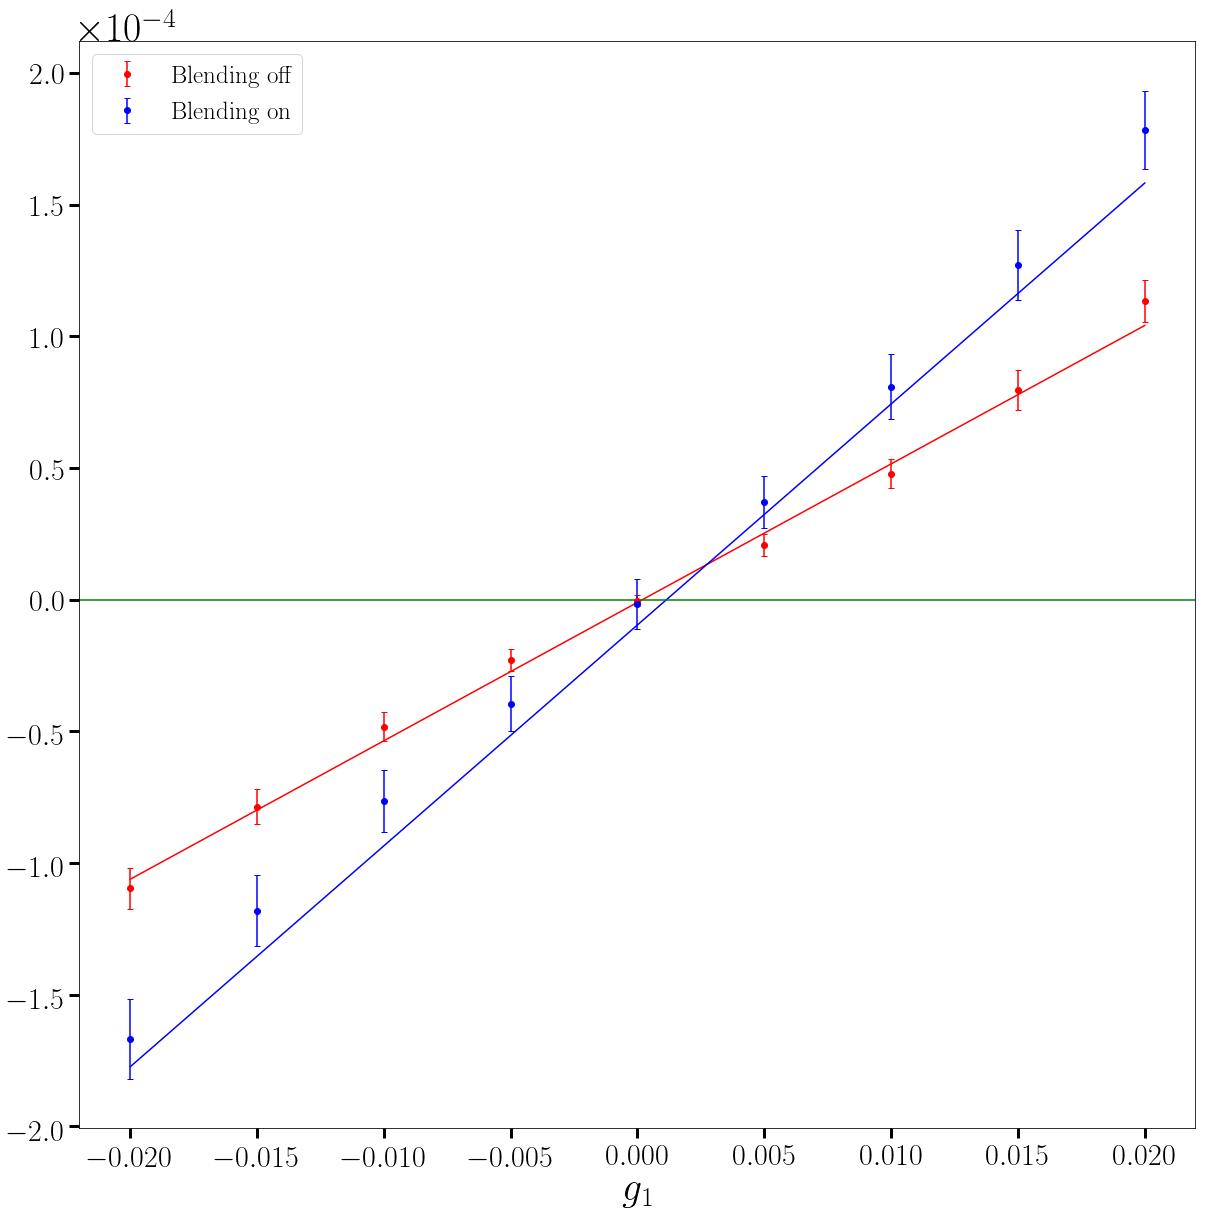

In [105]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

## weights

In [93]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(scats[0])))

In [94]:
weights_prep = money.prepare_money_plot(g1s, orig_ids, scats, weights.wmean, fit_procedure=money.chi_sq_fit, 
                                        N=int(1e4), model=money.linear_f, args_iso=['1', 'iso', 'component'], 
                                        args_grp=['1', 'grp', 'component'])

In [106]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = weights_prep

### check boostraps

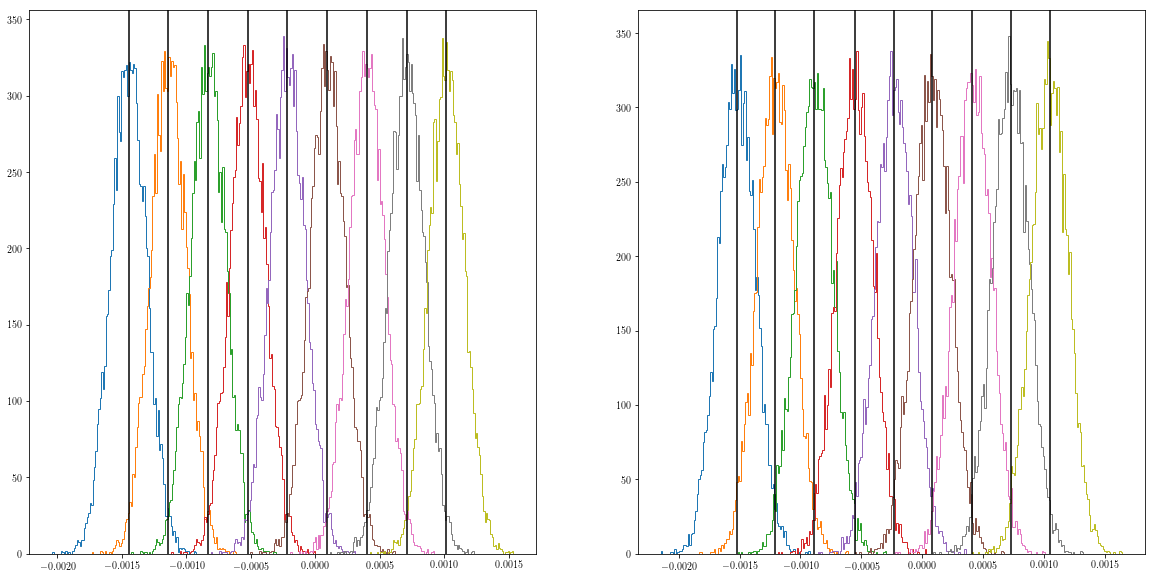

In [107]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
ax1,ax2 = axs.flatten()
for val, val_grp, vals, vals_grp  in zip(values, values_grp, boot_values, boot_values_grp): 
    ax1.hist(vals, histtype='step', bins=100)
    ax1.axvline(val,color='k')
    ax2.hist(vals_grp, histtype='step', bins=100)
    ax2.axvline(val_grp, color='k')

### make money plot

Results for fits of unblended case: 


 value b0:     6.162e-02
error b0:     3.851e-04
value b1:     -1.989e-04
error b1:     1.200e-04
error correlation coefficient: -6.274e-03

Results for fits of blended case: 


 value b0:     6.458e-02
error b0:     4.257e-04
value b1:     -2.449e-04
error b1:     1.498e-04
error correlation coefficient: -3.182e-03


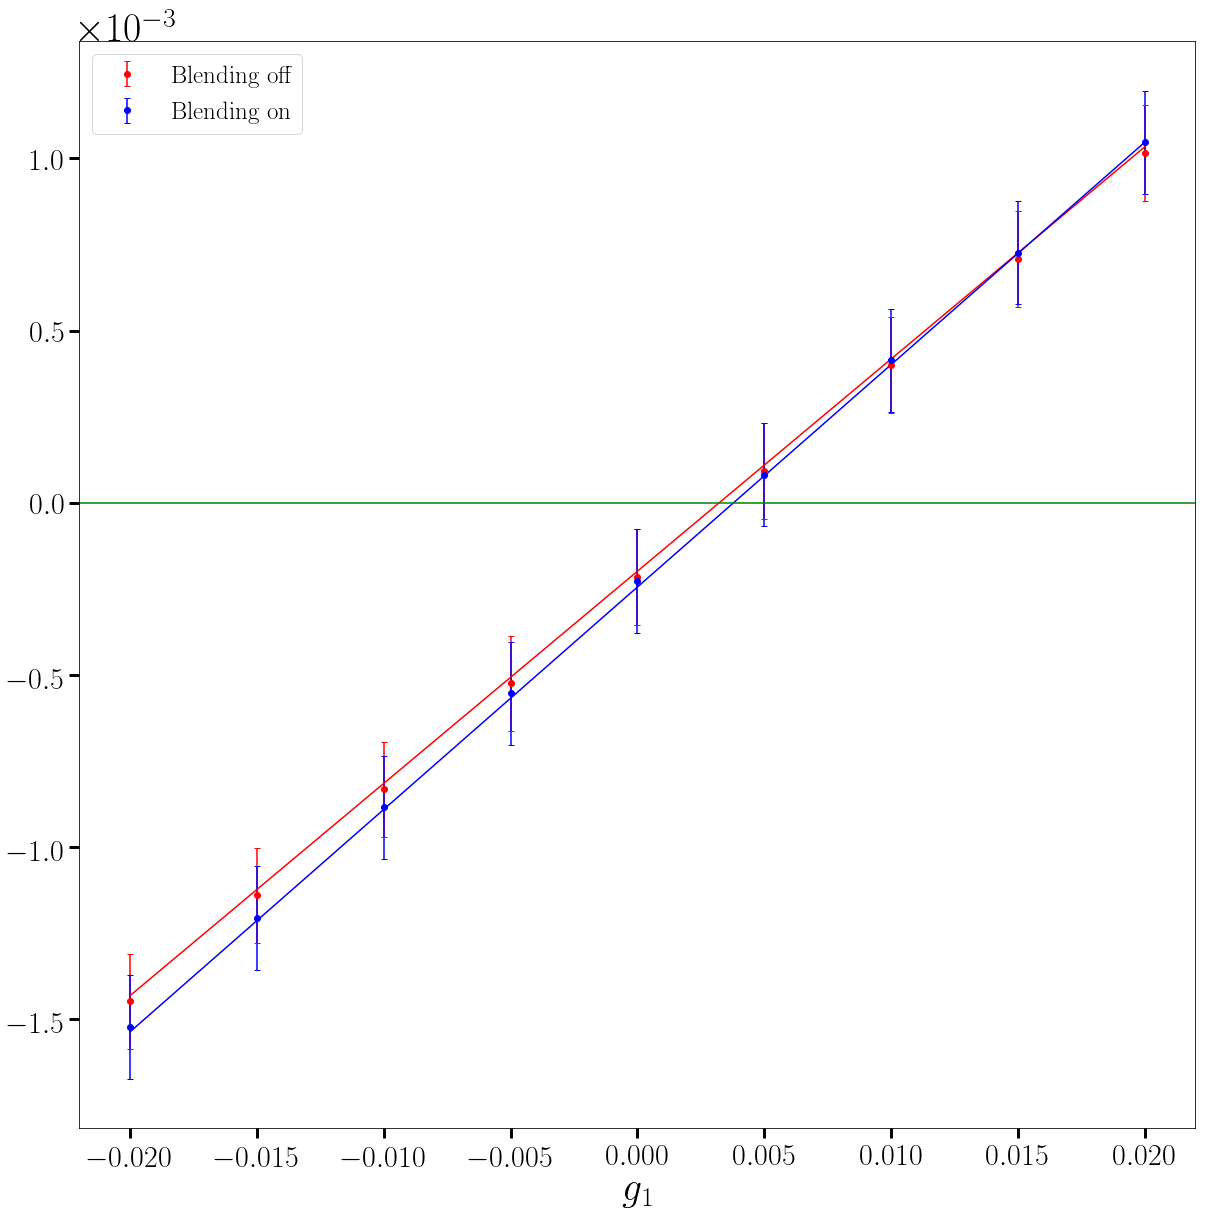

In [108]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

# Fisher elements

In [7]:
params = ['flux', 'x0', 'y0', 'ds', 'dg1', 'dg2']

from corner import corner
def get_fish_matrices(path, fits_file, grp_id, descwl):
    reader = descwl.output.Reader(os.path.join(path, fits_file))
    results = reader.results
    selected = results.select(f'grp_id=={grp_id}')
    sort_order = np.argsort(results.table['grp_rank'][selected])
    selected = selected[sort_order]
    fisher, cov, var, corr = results.get_matrices(selected)
    return (fisher, cov, var, corr), selected 

#alpha is decimal 
def remove_outliers(arr,alpha, tail='symmetric'):
    arr = np.array(arr)


    if tail=='symmetric':
        q1 = np.quantile(arr, alpha/2)
        q2 = np.quantile(arr, 1 - alpha/2)
        return arr[(arr>q1)&(arr<q2)]

    elif tail=='left':
        q1 = np.quantile(arr, alpha)
        return arr[arr>q1]

    elif tail=='right':
        q2 = np.quantile(arr, 1 - alpha)
        return arr[arr<q2]

    else: 
        raise NotImplementedError() 

In [8]:
data_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/data'
fits_file='idemo1.fits'

from WeakLensingDeblending import descwl


In [6]:
cat = Table.read(os.path.join(data_dir, fits_file))

## isolated cat

In [7]:
iso_cat = cat[cat['grp_size']==1]
len(iso_cat)

1635

In [8]:
# fishers = [] 
# for row in tqdm(iso_cat): 
#     grp_id = row['grp_id']
#     (fisher, cov, var, corr), _ = get_fish_matrices(data_dir, fits_file, grp_id, descwl)
#     fishers.append(fisher) 
# pickle.dump(fishers, open(f"{data_dir}/fish_iso.p", "wb"))

In [9]:
fishers = pickle.load(open(f"{data_dir}/fish_iso.p", "rb"), encoding='latin1')

### plot triangle plot (not corner) of fisher elements. 

In [10]:
#convert into corner format. 
fisher_elems = {} 
for fisher in fishers: 
    for i in range(6):
        for j in range(0,i+1): 
            
            if fisher_elems.get((i,j),None) is None: 
                fisher_elems[(i,j)] = [] 
                
            fisher_elems[(i,j)].append(fisher[i,j])

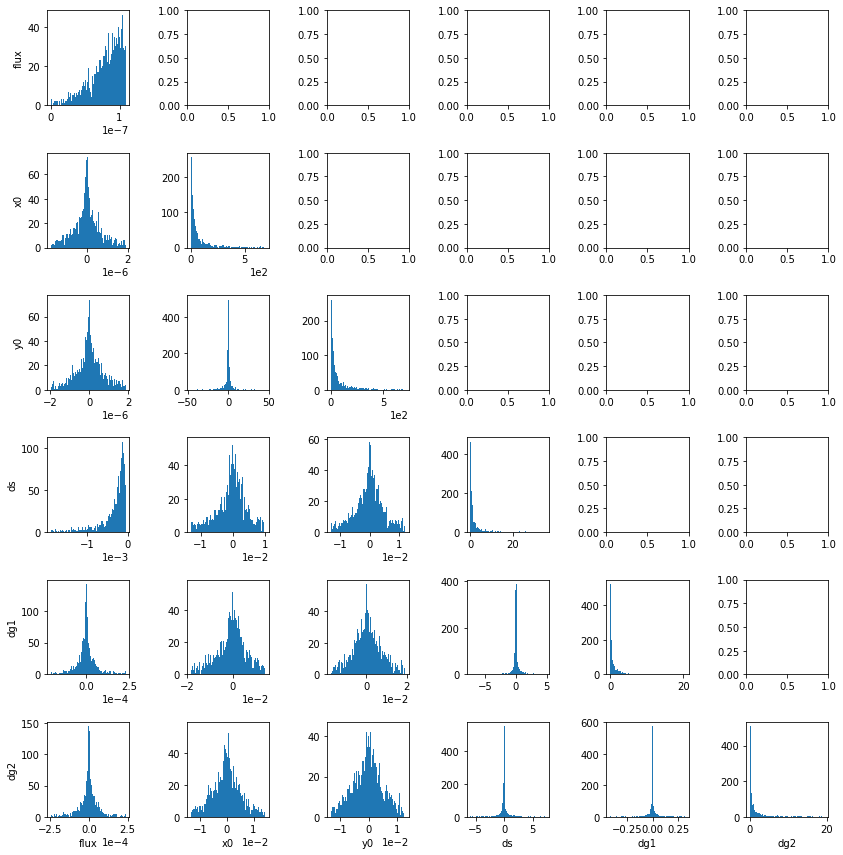

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(14, 14))
params = ['flux', 'x0', 'y0', 'ds', 'dg1', 'dg2'] #correct order. 
for i in range(6):
    for j in range(0,i+1):
        if i==j:
            tail="right"
        else: 
            tail="symmetric"
            
        axes[i,j].hist(remove_outliers(fisher_elems[i,j],0.1, tail=tail), bins=100)
        axes[i,j].tick_params(axis='x', which='major', labelsize=10) 
        axes[i,j].ticklabel_format(style='sci', axis='x', scilimits=(-2, 2))
        if j==0:
            axes[i,j].set_ylabel(params[i], size=10)
        if i==5:
            axes[i,j].set_xlabel(params[j], size=10)

fig.subplots_adjust(wspace=0.7,
                    hspace=0.5,
                    left=0.125, right=0.9,
                    top=0.9, bottom=0.1)

### Equilibration Results

In [18]:
#1e4 is based on the above triangle plot. 

from copy import deepcopy

efishers = deepcopy(fishers) 
for efish in efishers: 
    efish[0, :] = efish[0, :]*1e4
    efish[:, 0] = efish[:, 0]*1e4

### before

In [20]:
coefficients_min = []
coefficients_max = []

for fish in tqdm(fishers): 
    w, v = np.linalg.eig(fish) #w = eigenvalues, v = eigen
    vt = v.T # the rows are the eigenvectors instead of the columns. row i corresponds to eigenvalue i . 
    vt = vt[np.absolute(np.argsort(w))] #sort the rows according to the eigenvalues. 
    v1 = vt[0, :] #get the first row which corresponds to minimum eigenvalue vector. 
    v2 = vt[-1, :] #get the last row which corresponds to maximum eigenvalue vector. 

    coefficients_min.append(v1)
    coefficients_max.append(v2)
    
coefficients_min = np.array(coefficients_min)
coefficients_max = np.array(coefficients_max)

100%|██████████| 1635/1635 [00:00<00:00, 2315.94it/s]


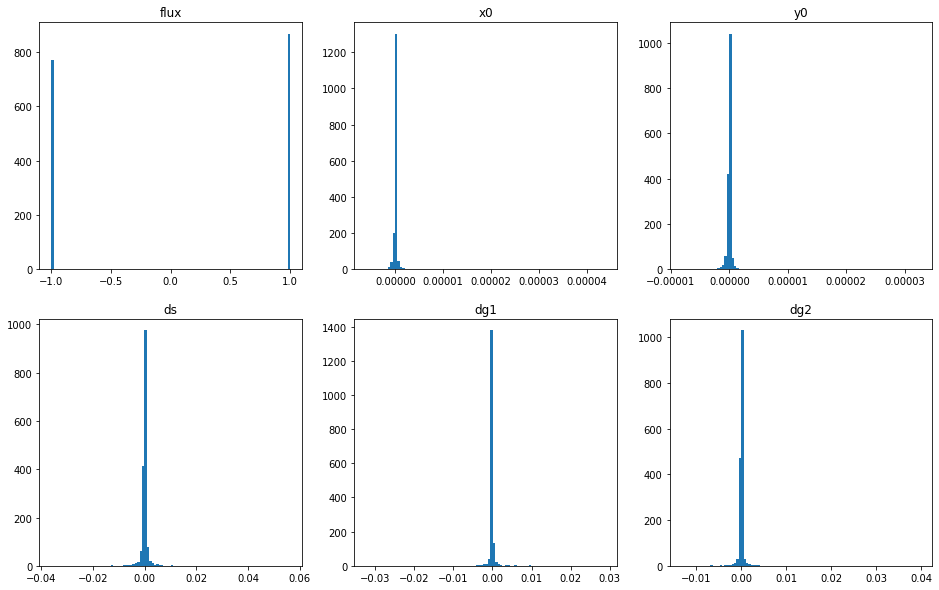

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
for row, param, ax in zip(coefficients_min.T, params, ax.flatten()):
    ax.hist(row, bins=100)
    ax.set_title(param)

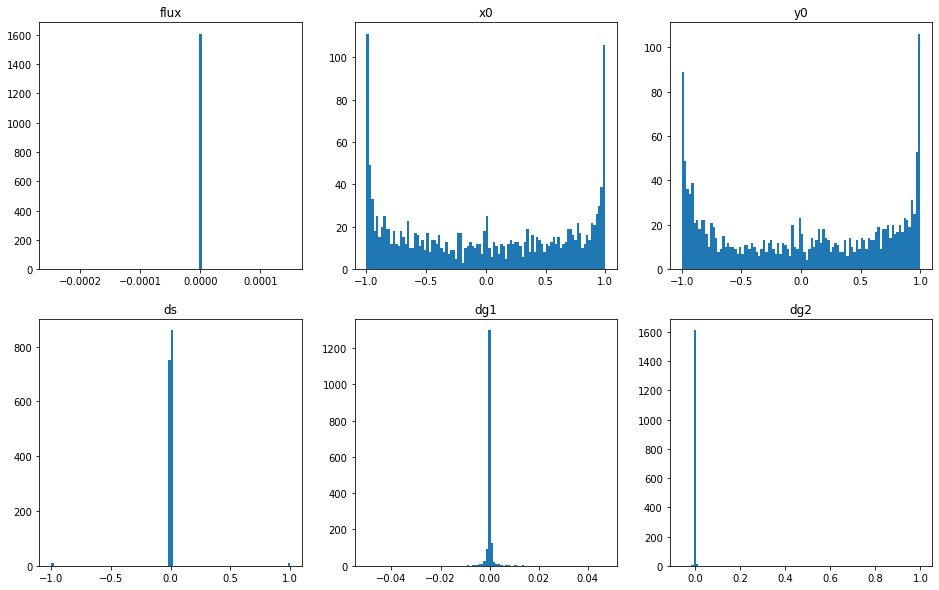

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
for row, param, ax in zip(coefficients_max.T, params, ax.flatten()):
    ax.hist(row, bins=100)
    ax.set_title(param)

Text(0, 0.5, 'Coefficients of y0 for max eigenvector')

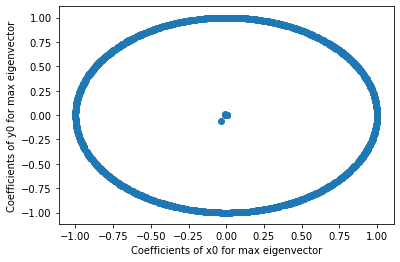

In [23]:
cx0 = coefficients_max.T[1]
cy0 = coefficients_max.T[2]
plt.scatter(cx0, cy0)
plt.xlabel("Coefficients of x0 for max eigenvector")
plt.ylabel("Coefficients of y0 for max eigenvector")

### After

In [26]:
coefficients_min = []
coefficients_max = []

for efish in efishers: 
    w, v = np.linalg.eig(efish) #w = eigenvalues, v = eigen
    vt = v.T # the rows are the eigenvectors instead of the columns. row i corresponds to eigenvalue i . 
    vt = vt[np.absolute(np.argsort(w))] #sort the rows according to the eigenvalues. 
    v1 = vt[0, :] #get the first row which corresponds to minimum eigenvalue vector. 
    v2 = vt[-1, :] #get the last row which corresponds to maximum eigenvalue vector. 

    coefficients_min.append(v1)
    coefficients_max.append(v2)
    
coefficients_min = np.array(coefficients_min)
coefficients_max = np.array(coefficients_max)

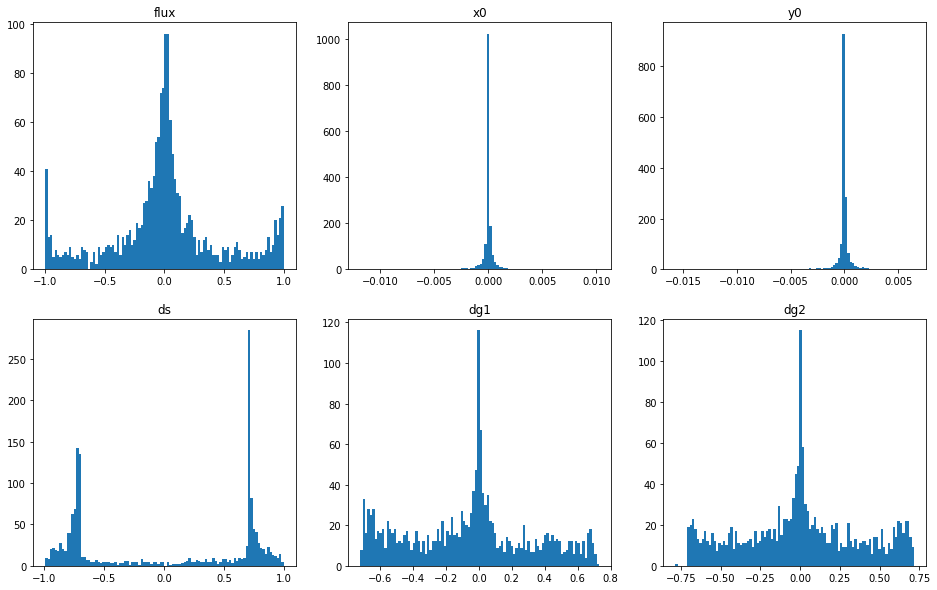

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
for row, param, ax in zip(coefficients_min.T, params, ax.flatten()):
    ax.hist(row, bins=100)
    ax.set_title(param)

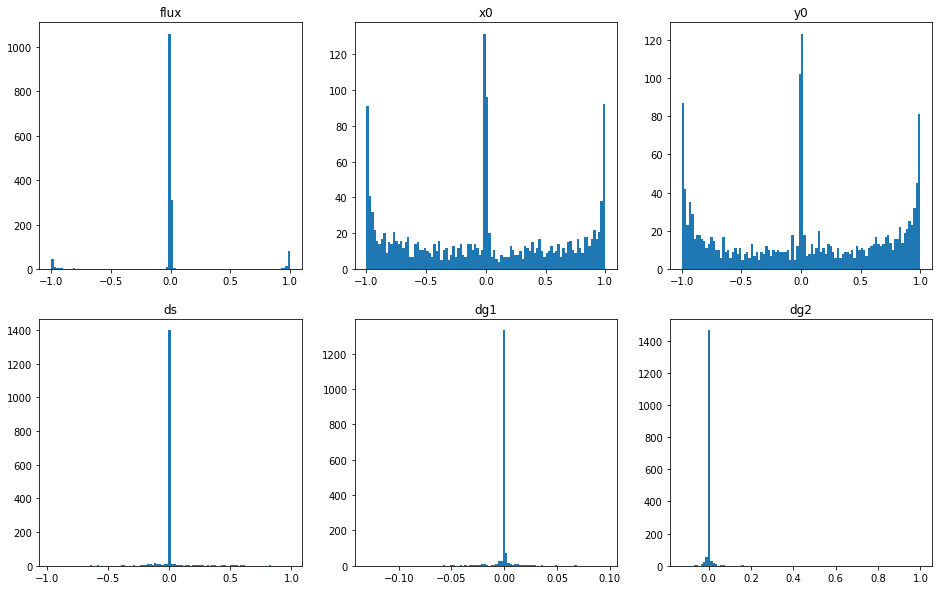

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
for row, param, ax in zip(coefficients_max.T, params, ax.flatten()):
    ax.hist(row, bins=100)
    ax.set_title(param)

### condition numbers

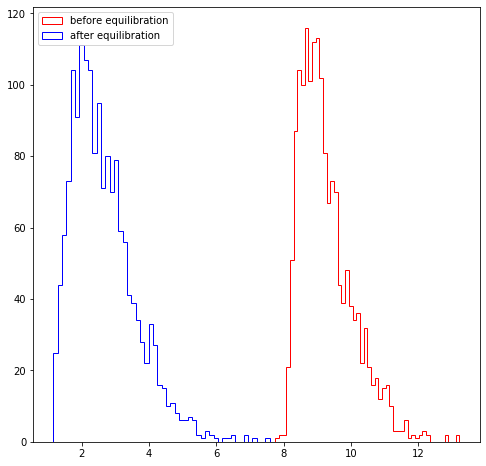

In [13]:
plt.figure(figsize=(8,8))
#condition numbers. 
conds1 = np.array([np.linalg.cond(fish) for fish in fishers])
conds2 = np.array([np.linalg.cond(efish) for efish in efishers])



plt.hist(np.log10(conds1[conds1 < np.inf]), bins=50, color= 'r', label='before equilibration', histtype='step');
plt.hist(np.log10(conds2[conds2 < np.inf]), bins=50, color= 'b', label='after equilibration',histtype='step');
plt.legend(loc='best')

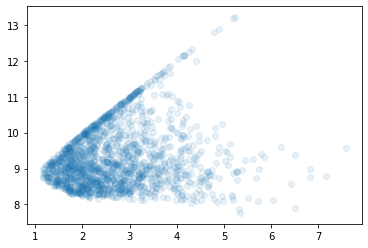

In [30]:
plt.scatter( np.log10(conds2[conds2 < np.inf]), np.log10(conds1[conds1 < np.inf]), alpha=0.1)

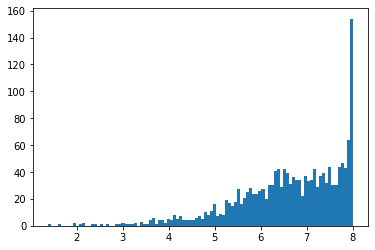

In [39]:
#compare both condition numbers. 
plt.hist( np.log10(conds1[conds1 < np.inf]) - np.log10(conds2[conds2 < np.inf]), bins=100);

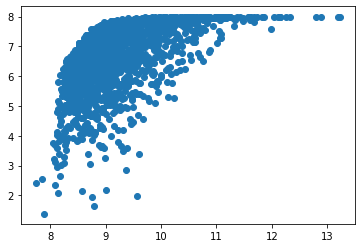

In [40]:
plt.scatter(np.log10(conds1[conds1 < np.inf]),    np.log10(conds1[conds1 < np.inf]) - np.log10(conds2[conds2 < np.inf]))

### Covariance matrix elements scatter plot (before and after)

In [19]:
covs = [] 
ecovs = [] 
for i, (fish, efish) in enumerate(zip(fishers, efishers)): 
    try: 
        inv = np.linalg.inv(fish)
        einv = np.linalg.inv(efish)
        
        #adjust to original as me and Pat discussed. 
        einv[0, :] = einv[0, :]*1e4
        einv[:, 0] = einv[:, 0]*1e4
        
        covs.append(inv)
        ecovs.append(einv)
    except: 
        print(f"error in {i}")
        continue

error in 577


In [20]:
#convert into corner format. 
covs_elems = {} 
ecovs_elems = {} 

for cov, ecov in zip(covs,ecovs): 
    for i in range(6):
        for j in range(0,i+1): 
            
            if covs_elems.get((i,j),None) is None: 
                covs_elems[(i,j)] = [] 
                
            if ecovs_elems.get((i,j),None) is None: 
                ecovs_elems[(i,j)] = [] 
                
            
            covs_elems[(i,j)].append(cov[i,j])
            ecovs_elems[(i,j)].append(ecov[i,j])

In [21]:
def plot_scatter_covs(ax, covs, ecovs, param1=None, param2=None, q=0.01):
    q1=np.quantile(covs, q)
    q2=np.quantile(covs, 1-q)

#     eq1=np.quantile(ecovs, q)
#     eq2=np.quantile(ecovs, 1-q) 
    
    
    ax.scatter(covs, np.array(covs) - np.array(ecovs))
    
    
    ax.tick_params(axis='x', which='major', labelsize=10) 
    ax.ticklabel_format(style='sci', axis='x', scilimits=(-2, 2))
    
    ax.set_xlim(q1,q2)
#     ax.set_ylim(eq1,eq2)
    
#     b = max(np.absolute([q1,q2,eq1,eq2]))
    ax.plot([-1e10, 1e10], [0, 0], color='red')

    if param1 is None and param2 is None:
        ax.set_xlabel(param1, size=10)
        ax.set_ylabel(param2, size=10)


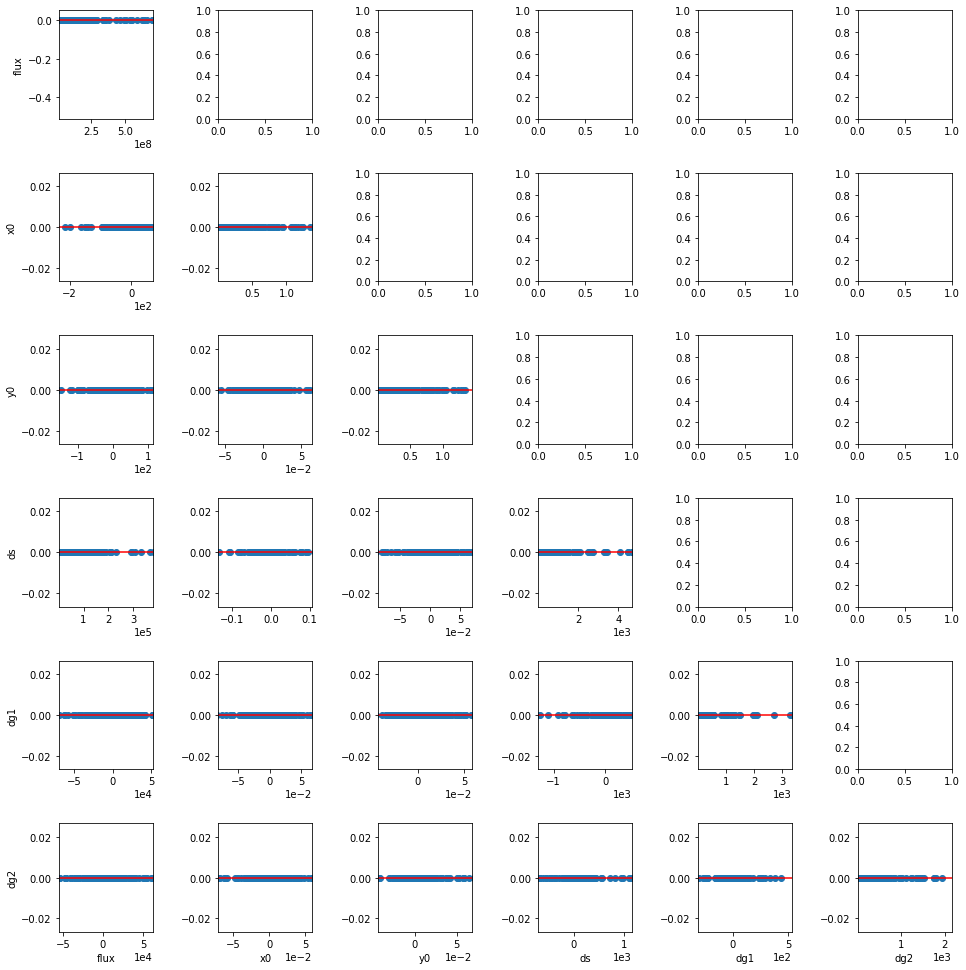

In [78]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(16, 16))
params = ['flux', 'x0', 'y0', 'ds', 'dg1', 'dg2'] #correct order. 
for i in range(6):
    for j in range(0,i+1):
    
        plot_scatter_covs(axes[i,j], covs_elems[i,j],  ecovs_elems[i,j])
        
        if j==0:
            axes[i,j].set_ylabel(params[i], size=10)
        if i==5:
            axes[i,j].set_xlabel(params[j], size=10)

fig.subplots_adjust(wspace=0.7,
                    hspace=0.5,
                    left=0.125, right=0.9,
                    top=0.9, bottom=0.1)

Mean relative difference


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.628e+03, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-6.46093980e-13, -5.43197679e-13, -4.40301379e-13, -3.37405079e-13,
        -2.34508778e-13, -1.31612478e-13, -2.87161776e-14,  7.41801228e-14,
         1.77076423e-13,  2.79972724e-13,  3.82869024e-13]),
 <a list of 10 Patch objects>)

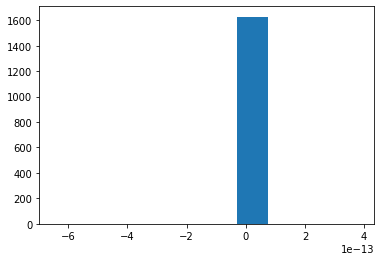

In [26]:
print("Mean relative difference")
plt.hist(np.absolute(np.array(covs_elems[1,0]) - np.array(ecovs_elems[1,0])) / np.array(covs_elems[1,0]))

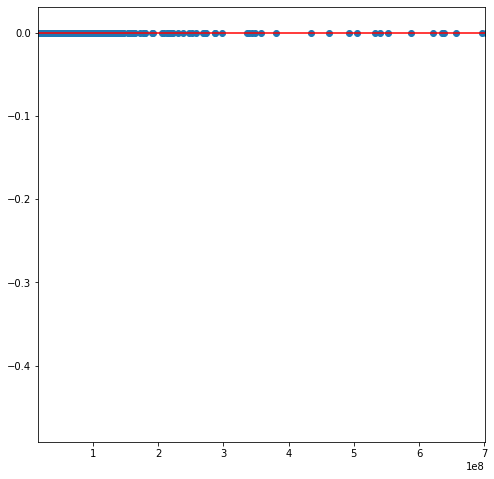

In [79]:
#plot some individually. 
fig, ax= plt.subplots(1, 1, figsize=(8,8))
plot_scatter_covs(ax, covs_elems[0,0], ecovs_elems[0,0], 'flux', 'flux')

## Groups equilibration

In [6]:
# gfishers = [] 
# for row in tqdm(cat): 
#     grp_id = row['grp_id']
#     (fisher, cov, var, corr), _ = get_fish_matrices(data_dir, fits_file, grp_id, descwl)
#     gfishers.append(fisher) 
# pickle.dump(gfishers, open(f"{data_dir}/gfish.p", "wb"))

In [56]:
gfishers = pickle.load(open(f"{data_dir}/gfish.p", "rb"), encoding='latin1')

(array([6830.,  624.,  441.,  154.,  101.,  244.,  150.,    0.,    0.,
         238.]),
 array([  1. ,  24.7,  48.4,  72.1,  95.8, 119.5, 143.2, 166.9, 190.6,
        214.3, 238. ]),
 <a list of 10 Patch objects>)

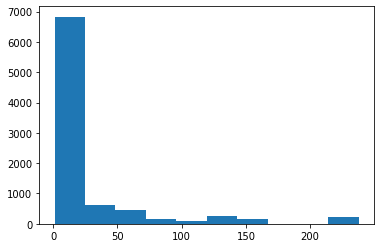

In [91]:
plt.hist([fish.shape[0]/6 for fish in gfishers])

In [8]:
def grl_equilibration(fish):
    dim = fish.shape[0]
    eqi = np.eye(dim)
    for i in range(dim): 
        if i%6==0:
            eqi[i,i] = 1e4
    return eqi.dot(fish.dot(eqi))

In [9]:
egfishers = []
for fish in gfishers: 
    egfishers.append(grl_equilibration(fish))

### group condition numbers. 

In [15]:
# #condition numbers. 
# conds1 = np.array([np.linalg.cond(fish) for fish in gfishers])
# conds2 = np.array([np.linalg.cond(efish) for efish in egfishers])
# pickle.dump(conds1, open(f"{data_dir}/gconds.p", "wb"))
# pickle.dump(conds2, open(f"{data_dir}/egconds.p", "wb"))

In [53]:
conds1 = pickle.load(open(f"{data_dir}/gconds.p", "rb"), encoding='latin1')
conds2 = pickle.load(open(f"{data_dir}/egconds.p", "rb"), encoding='latin1')

In [59]:
len(conds1[conds1<np.inf])
len(conds2[conds2<np.inf])

8704

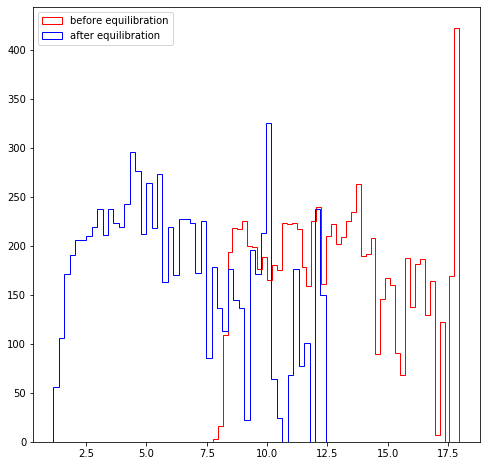

In [17]:
plt.figure(figsize=(8,8))

plt.hist(np.log10(conds1[conds1 < np.inf]), bins=50, color= 'r', label='before equilibration', histtype='step');
plt.hist(np.log10(conds2[conds2 < np.inf]), bins=50, color= 'b', label='after equilibration',histtype='step');
plt.legend(loc='best')

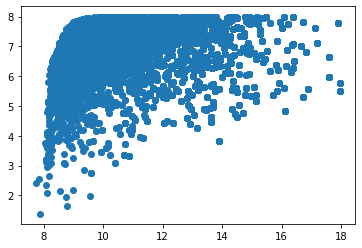

In [18]:
plt.scatter(np.log10(conds1[conds1 < np.inf]),    np.log10(conds1[conds1 < np.inf]) - np.log10(conds2[conds2 < np.inf]))

### investigate some covariance elements. 

In [10]:
# covs = [] 
# errs = [] 
# for i, fish in enumerate(gfishers): 
#     try: 
#         cov = np.linalg.inv(fish)
#         covs.append(cov)
#         errs.append(0)
#     except: 
#         print(f"error in {i}")
#         errs.append(1)
#         continue
# pickle.dump(covs, open(f"{data_dir}/gcovs.p", 'wb' ))

In [14]:
# ecovs = [] 
# eerrs= []
# for i, efish in enumerate(egfishers): 
#     try: 
#         ecov = np.linalg.inv(efish)
#         ecov = grl_equilibration(ecov)
#         ecovs.append(ecov)
#         eerrs.append(0)
#     except: 
#         print(f"error in {i}")
#         eerrs.append(1)
#         continue
#pickle.dump(ecovs, open(f"{data_dir}/egcovs.p", 'wb' ))

error in 3170
error in 4319
error in 4320
error in 4325
error in 4329
error in 4330
error in 4354
error in 4355
error in 4356
error in 4357
error in 4358
error in 4375
error in 4376
error in 4377
error in 4378
error in 4379
error in 4380
error in 4381
error in 4382
error in 4383
error in 4384
error in 4385
error in 4386
error in 4387
error in 4388
error in 4390
error in 4392
error in 4393
error in 4396
error in 4399
error in 4400
error in 4410
error in 4411
error in 4412
error in 4413
error in 4414
error in 4416
error in 4417
error in 4418
error in 4419
error in 4420
error in 4421
error in 4460
error in 4463
error in 4939
error in 4940
error in 4941
error in 4942
error in 4943
error in 4944
error in 4945
error in 4953
error in 4954
error in 4957
error in 4958
error in 4959
error in 4960
error in 4961
error in 4978
error in 4981
error in 4982
error in 4983
error in 4984
error in 4985
error in 4986
error in 4987
error in 4988
error in 4989
error in 4990
error in 4991
error in 4992
error 

In [9]:
covs = pickle.load(open(f"{data_dir}/gcovs.p", 'rb' ), encoding='latin1')
ecovs = pickle.load(open(f"{data_dir}/egcovs.p", 'rb' ), encoding='latin1')
print(len(covs))
print(len(ecovs))

In [11]:
params

['flux', 'x0', 'y0', 'ds', 'dg1', 'dg2']

In [13]:
variances=[[] for param in params] 
evariances=[[] for param in params]

for cov,ecov in zip(covs, ecovs):
    assert cov.shape==ecov.shape
    for i in range(cov.shape[0]):
        variances[i % 6].append(cov[i,i])
        evariances[i % 6].append(ecov[i,i])


In [35]:
def plot_scatter_covs(ax, covs, ecovs, param, q=0.01):
    qx = np.quantile(covs, 1-q)
    
    
    ax.scatter(covs, (np.array(covs) - np.array(ecovs))/ np.array(covs)  )
    
    
    ax.tick_params(axis='x', which='major', labelsize=10) 
    ax.ticklabel_format(style='sci', axis='x', scilimits=(-2, 2))
    
    ax.set_xlim(0,qx)
    ax.plot([0, 1e15], [0, 0], color='red')

    ax.set_title(param, fontsize=14)


In [47]:
np.min(variances[0])

15484822.218212025

In [52]:
for i in range(6):
    print(np.max(  np.absolute(np.array(variances[i]) - np.array(evariances[i]))/np.array(variances[i])))

1.751898022022662e-12
8.285783366519086e-13
3.7460967382261873e-13
1.6452328877350499e-12
3.7101145398915623e-13
4.618787251780568e-13


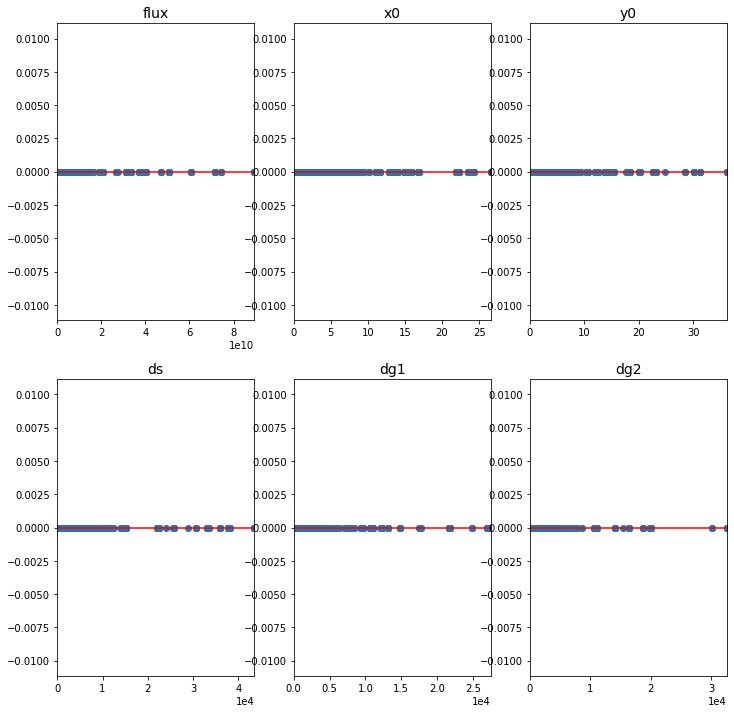

In [36]:
fig, axes = plt.subplots(2,3,figsize=(12,12))
for i, (param, ax) in enumerate(zip(params, axes.flatten())):
    plot_scatter_covs(ax, variances[i], evariances[i], param,q=0.001)

In [42]:
np.min(covs[0])

-4758077003.663679